In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cifar_10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar_10.load_data()

print(f"X train {x_train.shape}")
print(f"y train {y_train.shape}")
print(f"X test {x_test.shape}")
print(f"y test {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
X train (50000, 32, 32, 3)
y train (50000, 1)
X test (10000, 32, 32, 3)
y test (10000, 1)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input,BatchNormalization,Dropout

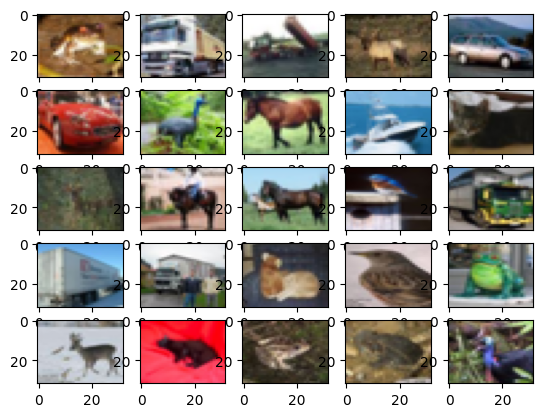

In [ ]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

In [ ]:
i = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=i, outputs=x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,277,130 (4.87 MB)

 Trainable params: 1,276,682 (4.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9521 - loss: 0.1571 - val_accuracy: 0.7743 - val_loss: 1.2072
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9580 - loss: 0.1441 - val_accuracy: 0.7765 - val_loss: 1.0223
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9542 - loss: 0.1512 - val_accuracy: 0.7661 - val_loss: 1.2450
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9550 - loss: 0.1471 - val_accuracy: 0.7738 - val_loss: 1.0256
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9537 - loss: 0.1527 - val_accuracy: 0.7851 - val_loss: 1.0323
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9548 - loss: 0.1452 - val_accuracy: 0.7688 - val_loss: 1.0722
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9552 - loss: 0.1493 - val_accuracy: 0.7723 - val_loss: 1.1137
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9614 - loss: 0.1301

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 1.4590


[1.471848726272583, 0.7809000015258789]

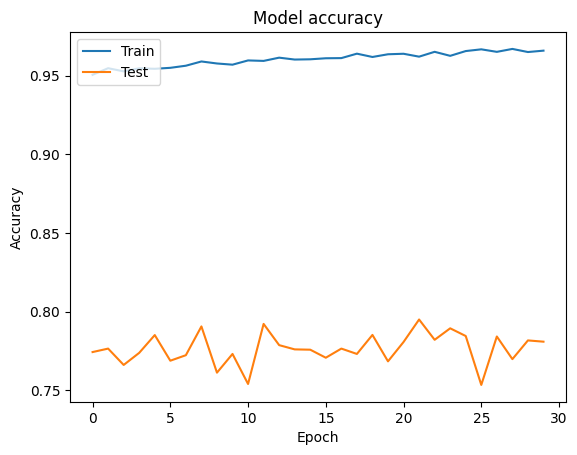

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


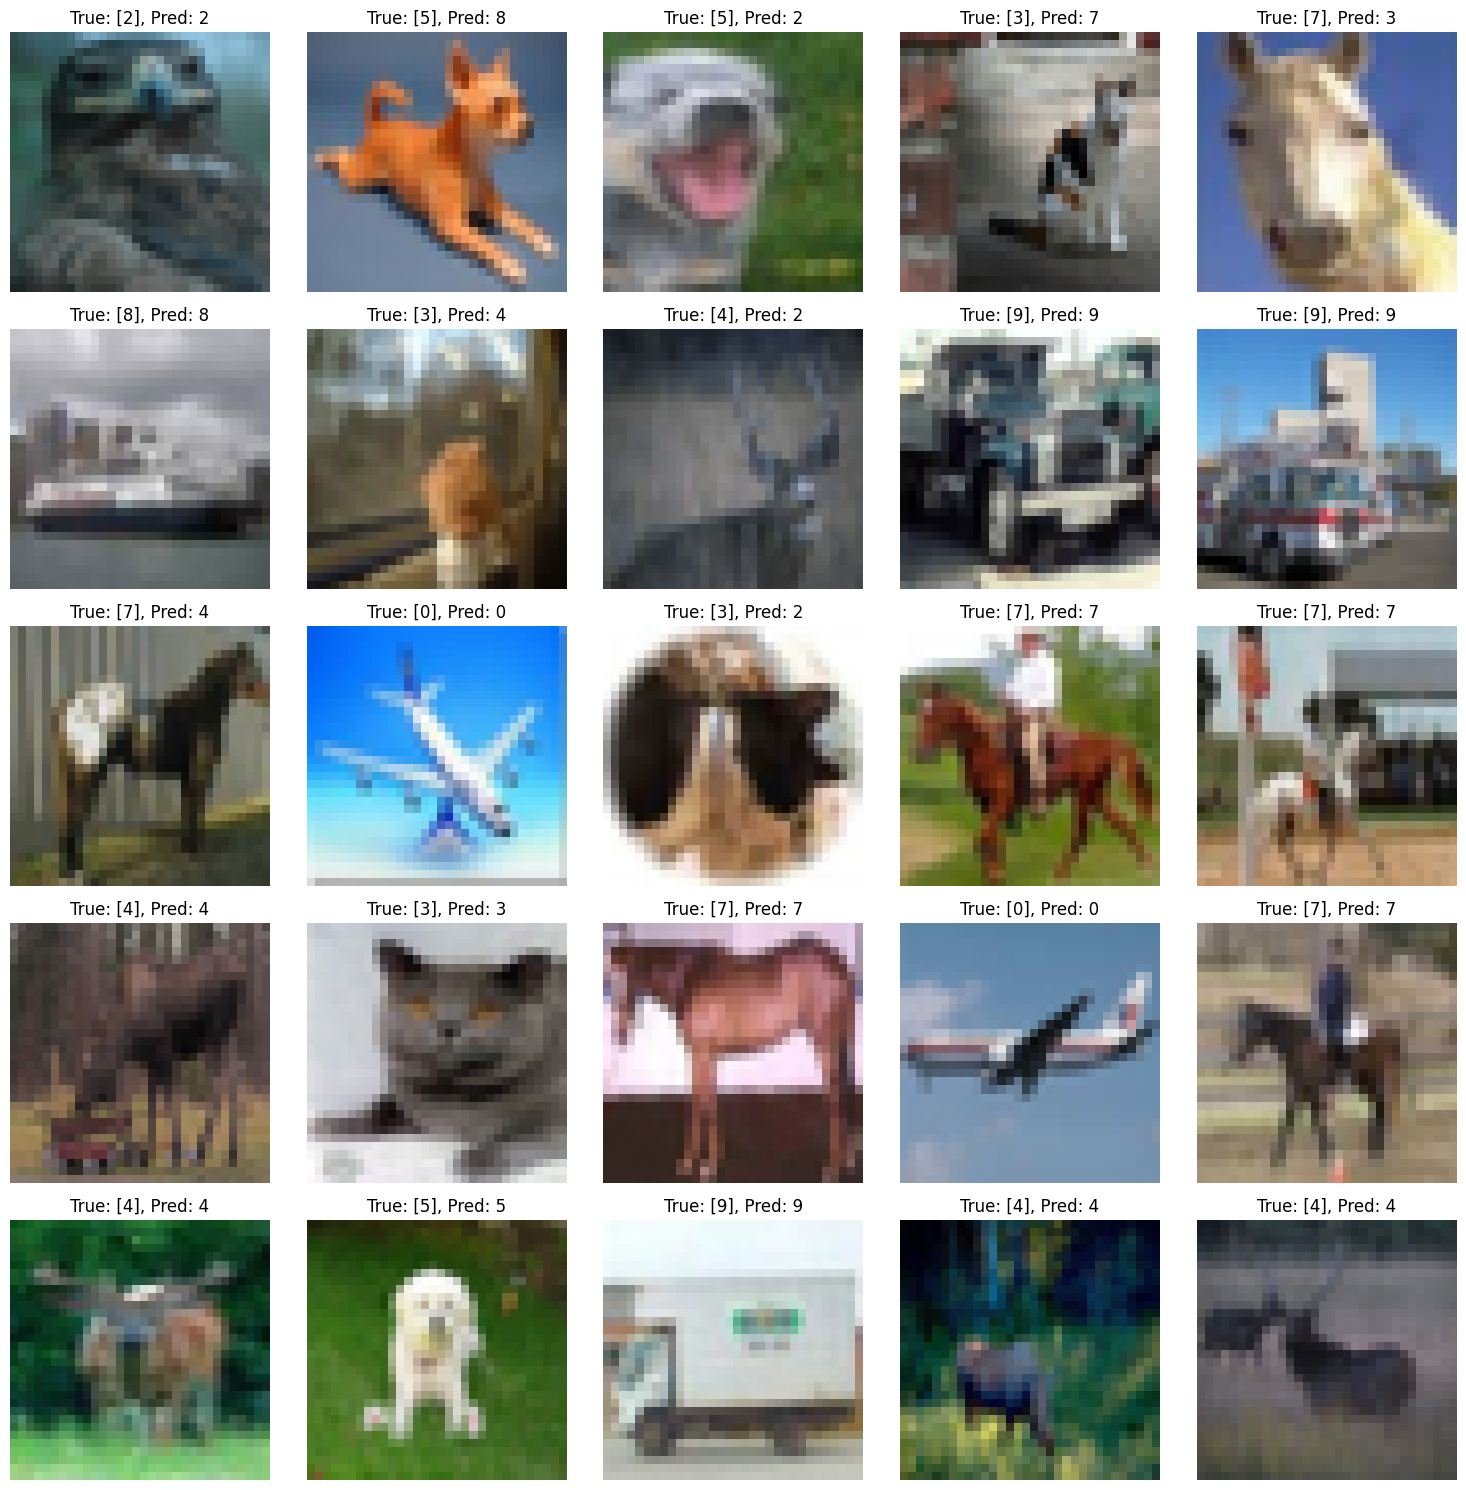

In [ ]:
num_images = 25
indices = np.random.choice(len(x_test), num_images, replace=False)
sample_images = x_test[indices]
true_labels = y_test[indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(num_images):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [ ]:
#batch_size = 32
#data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

#train_generato-r = data_generator.flow(x_train, y_train, batch_size)
#steps_per_epoch = x_train.shape[0] // batch_size

#r = model.fit(train_generator, validation_data=(x_test, y_test),steps_per_epoch=steps_per_epoch, epochs=50)

In [ ]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(x_test, y_test)
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.5484 - loss: 1.5511 - val_accuracy: 0.7505 - val_loss: 0.7928
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.6220 - loss: 1.1591 - val_accuracy: 0.7533 - val_loss: 0.7561
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.6372 - loss: 1.0932 - val_accuracy: 0.7498 - val_loss: 0.7522
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6615 - loss: 1.0294 - val_accuracy: 0.7526 - val_loss: 0.7557
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.6716 - loss: 0.9973 - val_accuracy: 0.7843 - val_loss: 0.6573
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.6726 - loss: 0.9875 - val_accuracy: 0.7862 - val_loss: 0.6509
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6800 - loss: 0.9594 - val_accuracy: 0.7779 - val_loss: 0.6517
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.6828 - loss: 0.9567 - val_accurac

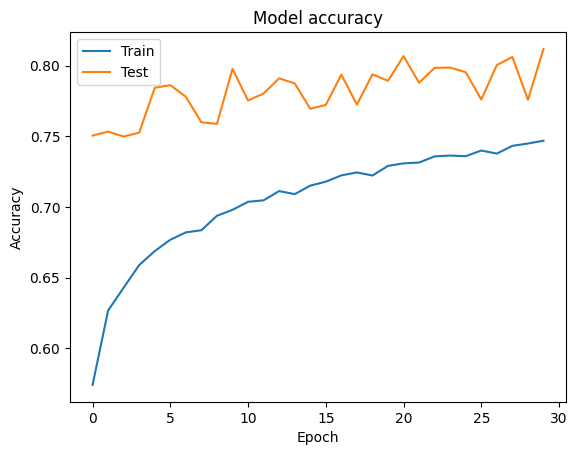

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8063 - loss: 0.5816


[0.5772949457168579, 0.8118000030517578]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


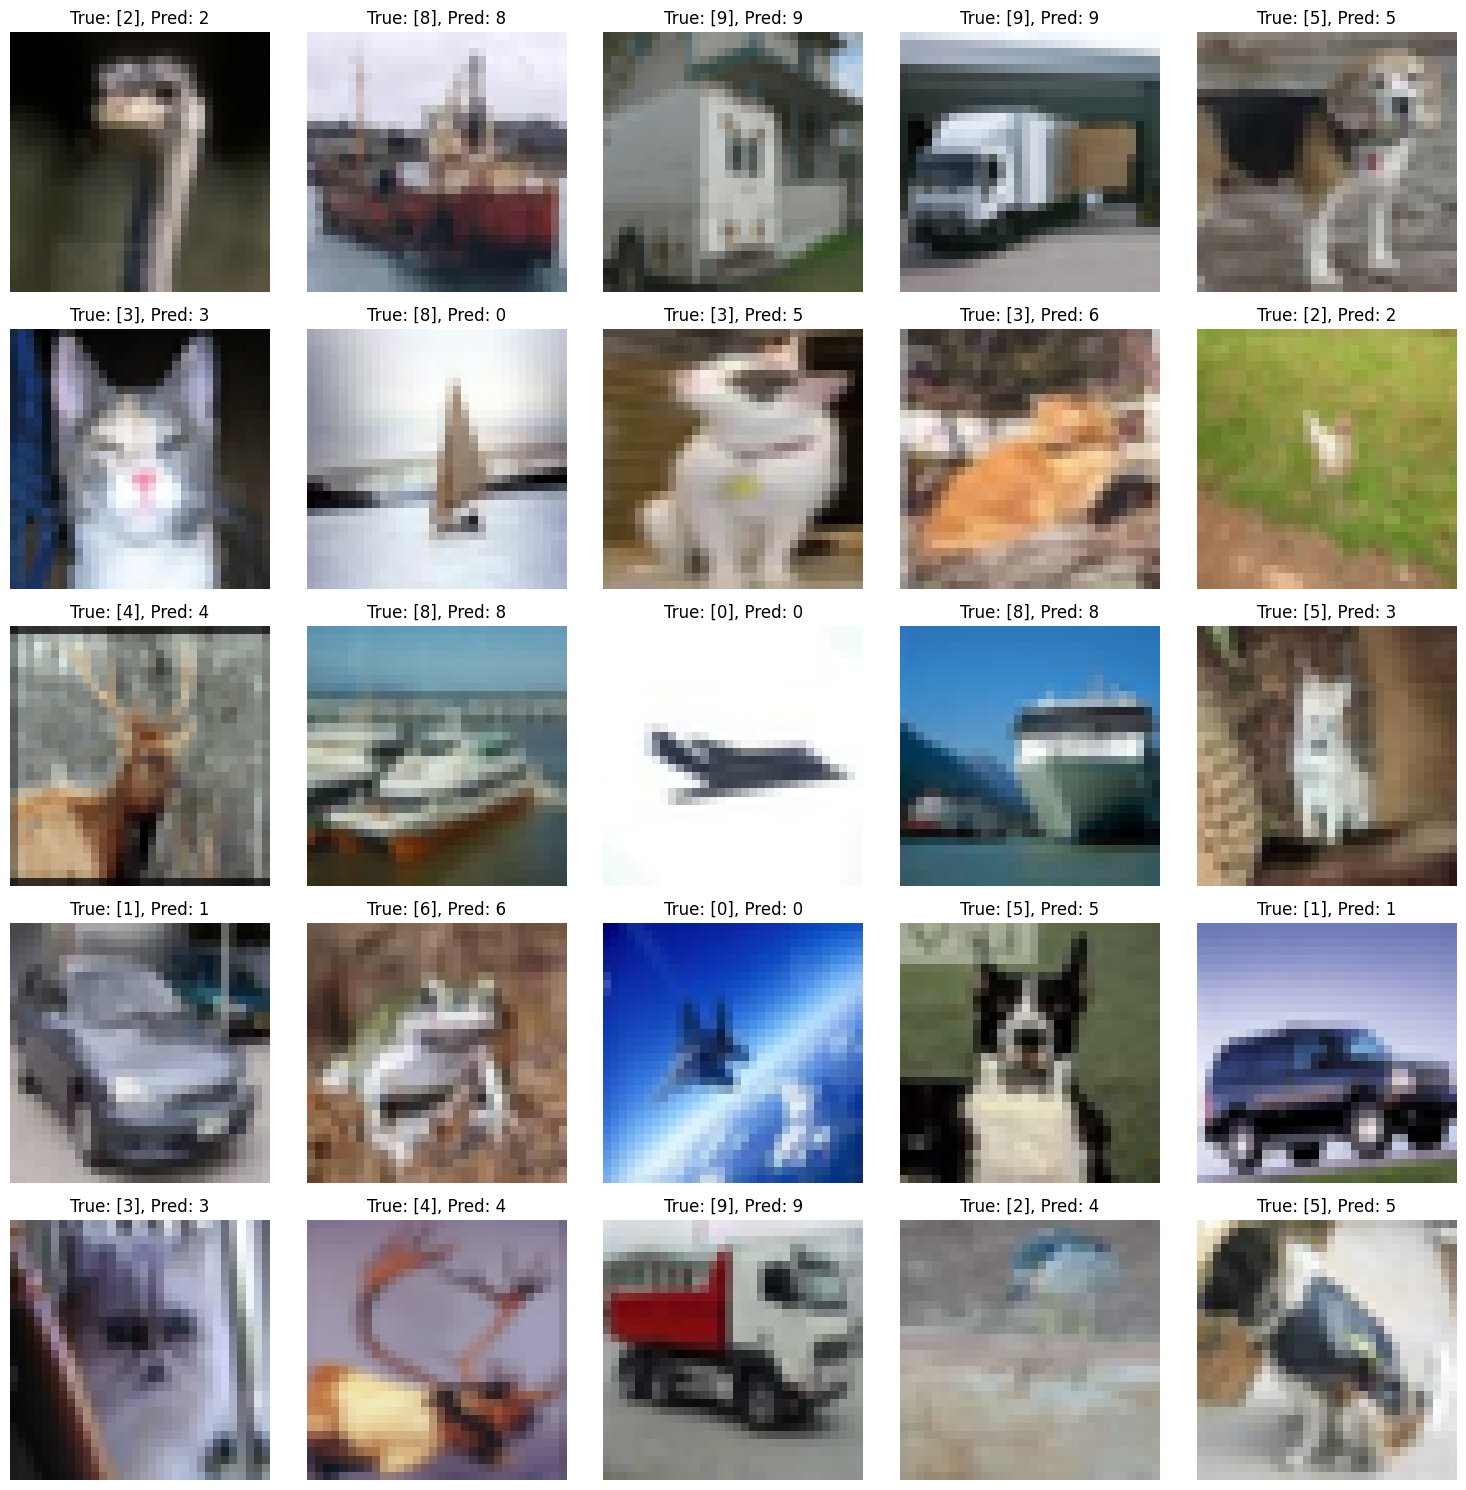

In [ ]:
num_images = 25
indices = np.random.choice(len(x_test), num_images, replace=False)
sample_images = x_test[indices]
true_labels = y_test[indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(num_images):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()